# Exercise - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### To read the data and print the first 5 lines

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
auto_data = pd.read_csv(filename, names = headers)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Is data missing in the table? Are there illegal values in the table?

In [5]:
auto_data.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Since we can see true values in the table above, it is safe to assume that the table has both invalid values and missing data.

#### Replace '?' with NaN values

In [6]:
auto_data = auto_data.replace('?',np.nan)

In [7]:
auto_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Missing Values in the Data Column Wise: 
normalized-losses - 41 <br>
num-of-doors - 2 <br>
bore - 4 <br>
stroke - 4 <br>
horsepower - 2 <br>
peak-rpm - 2 <br>
price - 4 

#### Drop rows where price is a missing value

In [8]:
auto_data.drop(auto_data[auto_data.price.isnull()].index, axis=0, inplace=True)
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Replacing the NA values of quantitative columns with the mean of the column

In [9]:
#normalized-losses
avg_norm_losses = auto_data['normalized-losses'].astype('float').mean(axis =0)
auto_data['normalized-losses'].replace(np.nan,avg_norm_losses,inplace = True)

#bore
avg_norm_losses = auto_data['bore'].astype('float').mean(axis =0)
auto_data['bore'].replace(np.nan,avg_norm_losses,inplace = True)

#stroke
avg_norm_losses = auto_data['stroke'].astype('float').mean(axis =0)
auto_data['stroke'].replace(np.nan,avg_norm_losses,inplace = True)

#horsepower
avg_norm_losses = auto_data['horsepower'].astype('float').mean(axis =0)
auto_data['horsepower'].replace(np.nan,avg_norm_losses,inplace = True)

#peak-rpm
avg_norm_losses = auto_data['peak-rpm'].astype('float').mean(axis =0)
auto_data['peak-rpm'].replace(np.nan,avg_norm_losses,inplace = True)

auto_data.shape

(201, 26)

#### Num-Of-Doors - replace the NA values with the median of the column

In [10]:
auto_data['num-of-doors'].replace(np.nan,auto_data['num-of-doors'].value_counts().idxmax(),inplace = True )
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Reset the index of the dataframe

In [11]:
auto_data.reset_index()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Checking the data type of the columns and converting numeric and quantitative columns to float or int

In [12]:
for i in auto_data._get_numeric_data().columns:
    auto_data[i] = auto_data[i].astype('float')
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    float64
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    float64
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### Transforming city-mpg and highway-mpg into liters/100km 

In [13]:
auto_data['city-L/100km'] = 235/auto_data['city-mpg']
auto_data['highway-L/100km'] = 235/auto_data['highway-mpg']
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21.0,27.0,13495,11.190476,8.703704
1,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21.0,27.0,16500,11.190476,8.703704
2,1.0,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19.0,26.0,16500,12.368421,9.038462
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24.0,30.0,13950,9.791667,7.833333
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18.0,22.0,17450,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23.0,28.0,16845,10.217391,8.392857
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19.0,25.0,19045,12.368421,9.400000
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18.0,23.0,21485,13.055556,10.217391
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26.0,27.0,22470,9.038462,8.703704


#### Normalize columns length, width, height so that their values range from 0 to 1

In [14]:
auto_data['length'] = auto_data['length']/auto_data['length'].max()
auto_data['width'] = auto_data['width']/auto_data['width'].max()
auto_data['height'] = auto_data['height']/auto_data['height'].max()

#### Plotting Histogram of the Horsepower

(array([14., 49., 30., 30., 38.,  2., 12., 13.,  8.,  1.,  3.,  0.,  0.,
         1.]),
 array([ 48.        ,  63.28571429,  78.57142857,  93.85714286,
        109.14285714, 124.42857143, 139.71428571, 155.        ,
        170.28571429, 185.57142857, 200.85714286, 216.14285714,
        231.42857143, 246.71428571, 262.        ]),
 <a list of 14 Patch objects>)

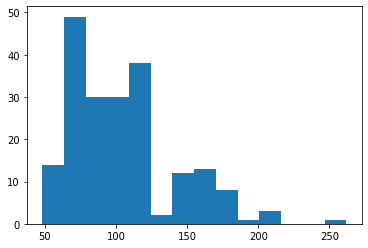

In [15]:
auto_data['horsepower'] = auto_data['horsepower'].astype('int')
plt.hist(auto_data.horsepower, bins='auto', rwidth=2, histtype='bar')

#### Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [16]:
temp = pd.cut(auto_data['horsepower'], bins = 3, labels = ['low','medium','high'])
auto_data['horsepower-binned'] = temp
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21.0,27.0,13495,11.190476,8.703704,low
1,3.0,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21.0,27.0,16500,11.190476,8.703704,low
2,1.0,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19.0,26.0,16500,12.368421,9.038462,medium
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24.0,30.0,13950,9.791667,7.833333,low
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18.0,22.0,17450,13.055556,10.681818,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23.0,28.0,16845,10.217391,8.392857,low
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19.0,25.0,19045,12.368421,9.400000,medium
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18.0,23.0,21485,13.055556,10.217391,medium
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26.0,27.0,22470,9.038462,8.703704,low


#### Plot the distribution of horsepower-binned 

(array([153.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

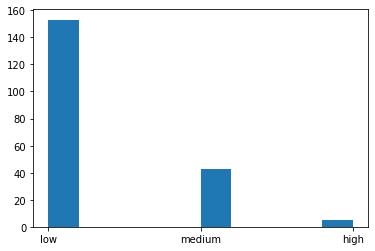

In [17]:
plt.hist(auto_data['horsepower-binned'])

#### Convert fuel-type and aspiration into one hot encoded variable

In [18]:
one_hot1 = pd.get_dummies(auto_data['fuel-type'])
one_hot2 = pd.get_dummies(auto_data['aspiration'])
auto_data = auto_data.join(one_hot1)
auto_data = auto_data.join(one_hot2)
auto_data.drop("fuel-type", axis = 1, inplace=True)
auto_data.drop("aspiration", axis = 1, inplace=True)

auto_data

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3.0,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21.0,27.0,13495,11.190476,8.703704,low,0,1,1,0
1,3.0,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21.0,27.0,16500,11.190476,8.703704,low,0,1,1,0
2,1.0,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19.0,26.0,16500,12.368421,9.038462,medium,0,1,1,0
3,2.0,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24.0,30.0,13950,9.791667,7.833333,low,0,1,1,0
4,2.0,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18.0,22.0,17450,13.055556,10.681818,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23.0,28.0,16845,10.217391,8.392857,low,0,1,1,0
201,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,19.0,25.0,19045,12.368421,9.400000,medium,0,1,0,1
202,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,18.0,23.0,21485,13.055556,10.217391,medium,0,1,1,0
203,-1.0,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,26.0,27.0,22470,9.038462,8.703704,low,1,0,0,1


<center>***************************</center>